# Libraries 

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

# Reading data

In [2]:
Train_File = pd.read_csv(r"C:\Users\DELL\Desktop\ITI Materials\Phase 2\WEEK_1\ML\Lec1\Task1\neolen-house-price-prediction\train.csv")

In [3]:
Test_File = pd.read_csv(r"C:\Users\DELL\Desktop\ITI Materials\Phase 2\WEEK_1\ML\Lec1\Task1\neolen-house-price-prediction\test.csv")

In [4]:
Submission_File = r"C:\Users\DELL\Desktop\ITI Materials\Phase 2\WEEK_1\ML\Lec1\Task1\neolen-house-price-prediction\sample_submission.csv"

# Data exploration and manipulation

In [7]:
Train_File

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1255,60,RL,60.0,6931,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,165400
1255,1256,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,127500
1256,1257,20,RL,91.0,14303,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,301500
1257,1258,30,RL,56.0,4060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,99900


In [5]:
# Number of missing values in each column of training data
missing_val_count_by_column_train_data = (Train_File.isnull().sum())
print(missing_val_count_by_column_train_data[missing_val_count_by_column_train_data > 0])

LotFrontage      218
Alley           1183
MasVnrType         7
MasVnrArea         7
BsmtQual          35
BsmtCond          35
BsmtExposure      36
BsmtFinType1      35
BsmtFinType2      36
FireplaceQu      599
GarageType        71
GarageYrBlt       71
GarageFinish      71
GarageQual        71
GarageCond        71
PoolQC          1255
Fence           1019
MiscFeature     1208
dtype: int64


In [8]:
Test_File.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,80,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1,1261,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1262,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1263,50,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
4,1264,70,RL,60.0,13515,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal


In [6]:
# Number of missing values in each column of test data
missing_val_count_by_column_test_data = (Test_File.isnull().sum())
print(missing_val_count_by_column_test_data[missing_val_count_by_column_test_data > 0])

LotFrontage      41
Alley           186
MasVnrType        1
MasVnrArea        1
BsmtQual          2
BsmtCond          2
BsmtExposure      2
BsmtFinType1      2
BsmtFinType2      2
Electrical        1
FireplaceQu      91
GarageType       10
GarageYrBlt      10
GarageFinish     10
GarageQual       10
GarageCond       10
PoolQC          198
Fence           160
MiscFeature     198
dtype: int64


In [15]:
# How is our data shaping up?
print('Our training dataset has {} rows and {} columns.'.format(Train_File.shape[0], Train_File.shape[1]))
print('Our test dataset has {} rows and {} columns.'.format(Test_File.shape[0], Test_File.shape[1]))

Our training dataset has 1259 rows and 81 columns.
Our test dataset has 201 rows and 80 columns.


In [16]:
# Train file statistical information
Train_File.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1259.000000,1259.000000,1041.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1252.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,630.000000,56.914218,70.110471,10524.300238,6.103257,5.570294,1971.478157,1984.816521,103.133387,443.334392,...,94.604448,46.150913,21.625099,3.482129,14.668785,1.819698,45.944400,6.315330,2007.799841,181144.812550
std,363.586303,42.353617,23.522213,10391.598333,1.381394,1.119465,29.933659,20.617506,182.185126,439.025793,...,123.939261,65.449317,60.920712,29.289552,54.093490,32.364185,525.688744,2.684202,1.324095,80588.024473
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,315.500000,20.000000,59.000000,7590.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,630.000000,50.000000,70.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,944.500000,70.000000,80.000000,11611.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213750.000000
max,1259.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    Train_File.SalePrice.min(), Train_File.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    Train_File.SalePrice.mean(), Train_File.SalePrice.median()))

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $181,145, while median is $163,500


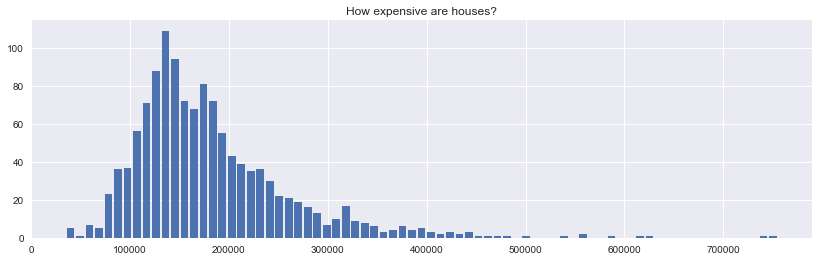

In [18]:
Train_File.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

In [19]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    Train_File.YearBuilt.min(), Train_File.YearBuilt.max()))

Oldest house built in 1875. Newest house built in 2010.


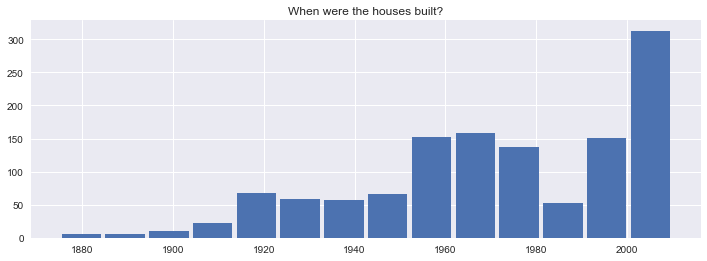

In [20]:
Train_File.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

In [21]:
# # When where houses sold?
# Train_File.groupby(['YrSold','MoSold']).count().plot(kind='barh', figsize=(14,21.8))
# plt.title('When where houses sold?')
# plt.show()

In [22]:
# # Where are houses?

# Train_File.groupby('Neighborhood').count().plot(kind='barh', figsize=(14,21.85))
# plt.title('What neighborhoods are houses in?')
# plt.show()

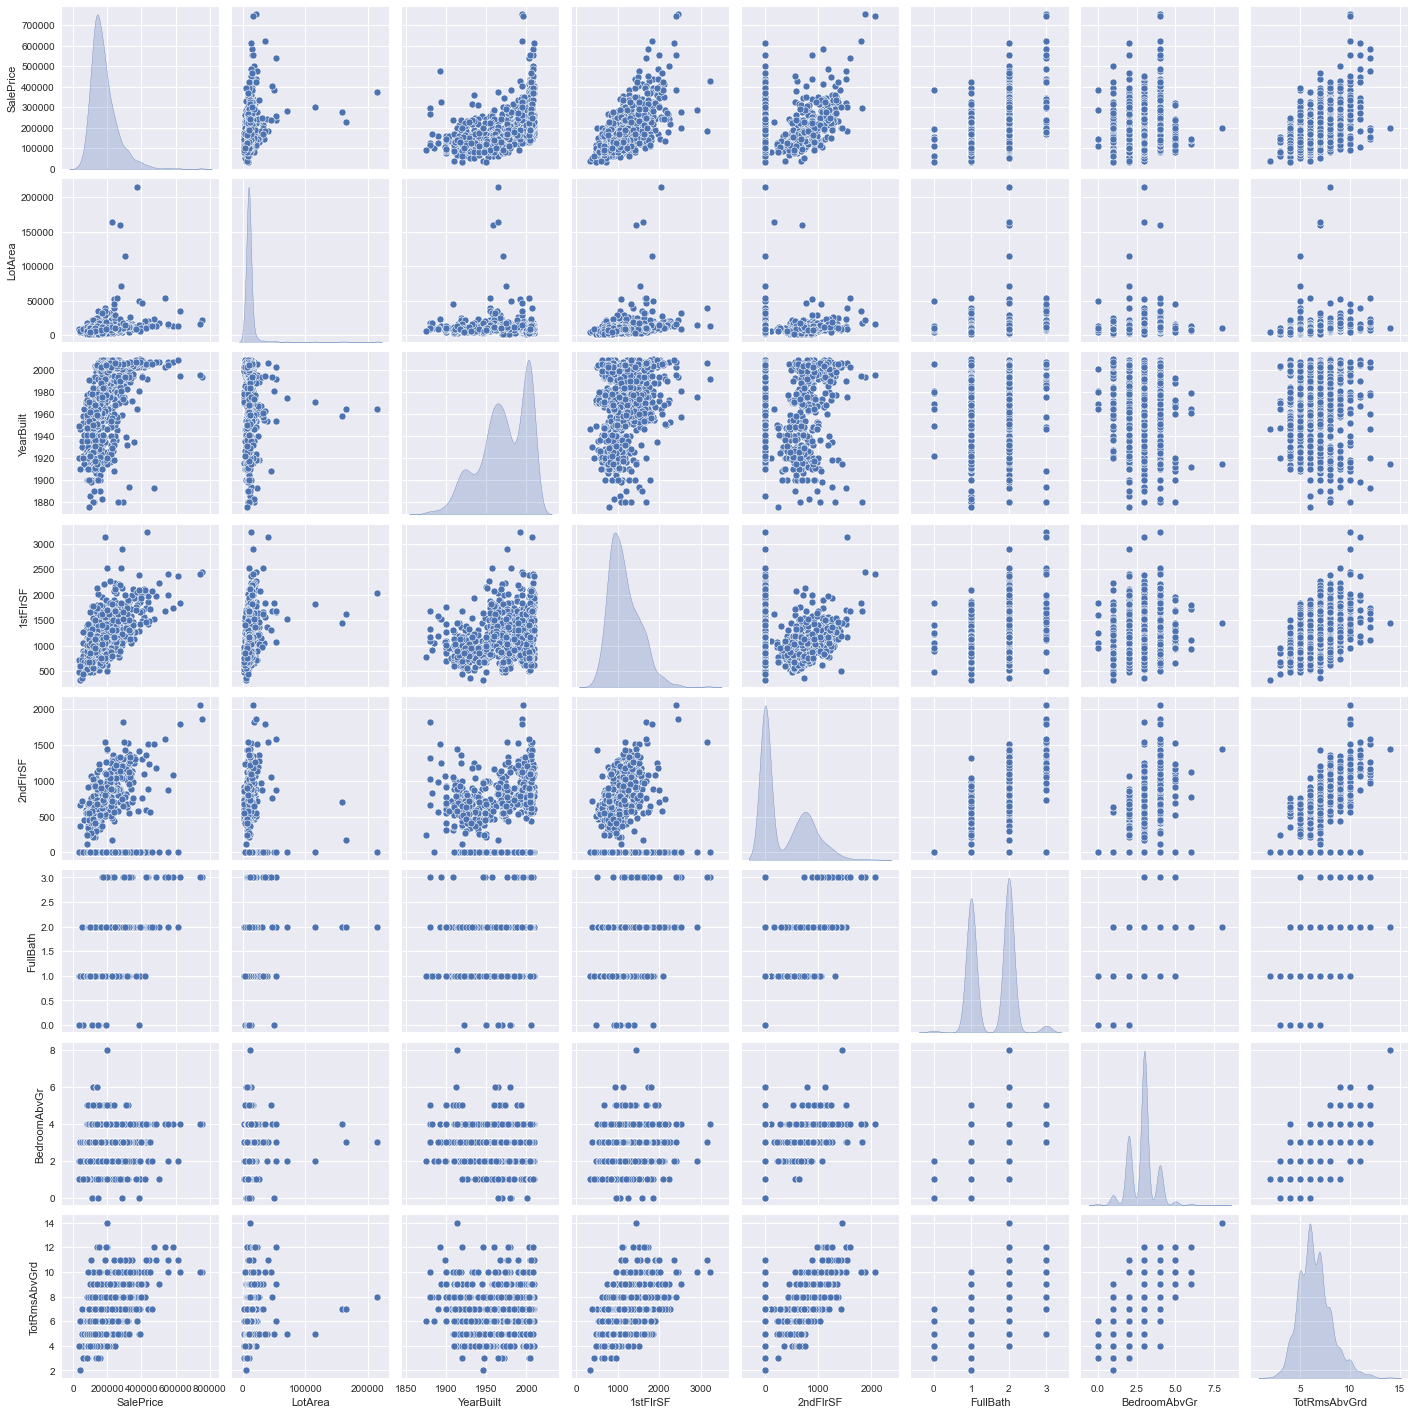

In [24]:
sns.pairplot(Train_File[["SalePrice", "LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]], diag_kind="kde")

## drop the records (rows) contatinig missing values in the output column 

In [25]:
# Remove rows with missing target, separate target from predictors
Train_File.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = Train_File.SalePrice              
Train_File.drop(['SalePrice'], axis=1, inplace=True)
x = Train_File.copy()

## Spliting training data into train set and validation set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

## Selecting categorical and numerical columns 

In [27]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
xTrain = X_train[my_cols].copy()
xValid = X_valid[my_cols].copy()
xTest = Test_File[my_cols].copy()

## Onehot encoding (dummy)

In [28]:

# One-hot encode the data (to shorten the code, we use pandas)
xTrain = pd.get_dummies(xTrain)
xValid = pd.get_dummies(xValid)
xTest = pd.get_dummies(xTest)
xTrain, xValid = xTrain.align(xValid, join='left', axis=1)
xTrain, xTest = xTrain.align(xTest, join='left', axis=1)


In [29]:
print(len(numeric_cols))
print(len(low_cardinality_cols))

37
40


In [30]:
# Shape of training data (num_rows, num_columns)
print(xTrain.shape)
xTrain.isnull().sum()

(1007, 227)


Id                         0
MSSubClass                 0
LotFrontage              175
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 227, dtype: int64

In [31]:
# Number of missing values in each column of training data
missing_val_count_by_column = (xTrain.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage    175
MasVnrArea       6
GarageYrBlt     53
dtype: int64


In [32]:
# Shape of training data (num_rows, num_columns)
print(xTest.shape)
xTest.isnull().sum()

(201, 227)


Id                         0
MSSubClass                 0
LotFrontage               41
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand    201
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 227, dtype: int64

In [33]:
# Number of missing values in each column of training data
missing_val_count_by_column_test = (xTest.isnull().sum())
print(missing_val_count_by_column_test[missing_val_count_by_column_test > 0])

LotFrontage               41
MasVnrArea                 1
GarageYrBlt               10
Street_Grvl              201
Utilities_NoSeWa         201
Condition1_RRNe          201
Condition1_RRNn          201
Condition2_Artery        201
Condition2_Feedr         201
Condition2_PosA          201
Condition2_PosN          201
Condition2_RRAn          201
Condition2_RRNn          201
RoofMatl_Membran         201
RoofMatl_Metal           201
RoofMatl_WdShngl         201
ExterCond_Ex             201
ExterCond_Po             201
Foundation_Wood          201
BsmtCond_Po              201
HeatingQC_Po             201
Electrical_FuseP         201
Electrical_Mix           201
Functional_Maj2          201
Functional_Sev           201
GarageType_2Types        201
GarageType_CarPort       201
GarageQual_Ex            201
GarageQual_Po            201
GarageCond_Ex            201
PoolQC_Ex                201
MiscFeature_Gar2         201
MiscFeature_Othr         201
SaleType_Con             201
SaleType_ConLD

# Dealing with missing values

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(imputer.fit_transform(xTrain))
imputed_X_valid = pd.DataFrame(imputer.transform(xValid))
imputed_X_test = pd.DataFrame(imputer.transform(xTest))

# imputation removed column names; put them back
imputed_X_train.columns = xTrain.columns
imputed_X_valid.columns = xValid.columns
imputed_X_test.columns = xTest.columns

In [36]:
# Preprocessed training and validation features
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(xTrain))
final_X_valid = pd.DataFrame(final_imputer.transform(xValid))
final_X_test = pd.DataFrame(final_imputer.transform(xTest))

# Imputation removed column names; put them back
final_X_train.columns = xTrain.columns
final_X_valid.columns = xValid.columns
final_X_test.columns = xTest.columns

# Models

## 1. XGBRegressor

In [37]:
# from xgboost import XGBRegressor
# # from xgboost.sklearn import XGBRegressor
# from sklearn import metrics
# # from ml_metrics import rmse

# # Define the model
# model = XGBRegressor(n_estimators=350,max_depth=15,learning_rate=.1,random_state=1,
#                      n_jobs=10, subsample=1,min_child_weight=0.6) 

# # Fit the model
# model.fit(final_X_train, y_train)

# # Get validation predictions and MAE
# preds_valid = model.predict(final_X_valid)


# print("RMSE (Your appraoch):")
# # print(rmse(y_valid, preds_valid))
# print(np.sqrt(metrics.mean_squared_error(y_valid, preds_valid)))

In [38]:
# import pyxgboost
# print(xgboost.__version__)

## 2. LinearRegression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
# from sklearn.metrics import r2_score

# Define the model
model = LinearRegression()
# Fit the model
model.fit(final_X_train, y_train)
# Get validation predictions and MAE
preds_valid = pd.Series(model.predict(final_X_valid))


In [40]:
# print('Coefficients: \n', model.coef_)
print("MAE: ", metrics.mean_absolute_error(y_valid, preds_valid))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_valid, preds_valid))
# print("RMSE:", np.sqrt(metrics.mean_squared_error(y_valid, preds_valid)))

print('Variance score (r2): %.2f' % metrics.r2_score(y_valid, preds_valid))
# print("r2 score:", metrics.r2_score(y_valid, preds_valid))

MAE:  20803.521129565815
Mean squared error: 1596315554.72
Variance score (r2): 0.79


## 3. statsmodels

In [41]:
# Import statsmodels package
import statsmodels.api as sm
# You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀.
# It doesn’t takes 𝑏₀ into account by default
xx = np.ones(252).reshape(-1,1)
xx = sm.add_constant(xx)
# Let's print x to make sure
# print(x)

In [42]:
# Create model
model_sm = sm.OLS(np.array(y_train), np.array(final_X_train))
# Fit the model
results = model_sm.fit()

In [43]:
# Print regression summary 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     66.44
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        02:06:06   Log-Likelihood:                -11354.
No. Observations:                1007   AIC:                         2.310e+04
Df Residuals:                     811   BIC:                         2.406e+04
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0614      2.066      0.514      0.608      -2.994       5.117
x2           -20.9196     85.251     -0.245      0.806    -188.259     146.420
x3            70.6923     49.705      1.422      0.155     -26.874     168.258
x4             0.7058      0.112      6.276      0.000       0.485       0.927
x5          8952.8871   1103.196      8.115      0.000    6787.432    1.11e+04
x6          5701.9876   1046.072      5.451      0.000    3648.661    7755.315
x7           210.5091     86.915      2.422      0.016      39.905     381.114
x8            71.4372     65.592      1.089      0.276     -57.313     200.187
x9            34.1789      6.625      5.159      0.000      21.175      47.183
x10           16.5722      3.376      4.909      0.000       9.946      23.199
x11            8.1915      7.088      1.156      0.248      -5.721      22.104
x12           -0.4689      3.216     -0.146      0.884      -6.781       5.844
x13           24.2947      4.697      5.173      0.000      15.076      33.513
x14           17.1585      6.843      2.507      0.012       3.726      30.591
x15           28.9461      5.939      4.874      0.000      17.288      40.604
x16           -2.3249     14.754     -0.158      0.875     -31.286      26.636
x17           43.7795      6.277      6.975      0.000      31.458      56.101
x18         1371.1524   2238.883      0.612      0.540   -3023.536    5765.840
x19         2149.6460   3582.856      0.600      0.549   -4883.118    9182.410
x20         2297.4889   2428.730      0.946      0.344   -2469.849    7064.827
x21         1636.7405   2448.338      0.669      0.504   -3169.086    6442.567
x22        -6517.3527   1536.365     -4.242      0.000   -9533.073   -3501.632
x23        -2.116e+04   6328.084     -3.344      0.001   -3.36e+04   -8739.937
x24         1627.3633   1107.355      1.470      0.142    -546.256    3800.982
x25           -5.7804   2861.926     -0.002      0.998   -5623.435    5611.874
x26         -115.2349     73.322     -1.572      0.116    -259.159      28.689
x27         1733.5864   2680.344      0.647      0.518   -3527.642    6994.815
x28           21.9932      9.231      2.383      0.017       3.874      40.112
x29           13.9743      6.815      2.050      0.041       0.596      27.352
x30            3.1675     13.258      0.239      0.811     -22.857      29.192
x31           11.0270     14.549      0.758      0.449     -17.532      39.586
x32           40.5897     27.919      1.454      0.146     -14.212      95.392
x33           30.3746     15.096      2.012      0.045       0.743      60.006
x34         6692.9476    846.287      7.909      0.000    5031.776    8354.120
x35            6.8614      7.066      0.971      0.332      -7.009      20.732
x36         -344.2315    286.545     -1.201      0.230    -906.688     218.225
x3

# Improve the model by Feature

In [44]:
feature_columns = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
                   'BedroomAbvGr', 'TotRmsAbvGrd']
X_up = x[feature_columns]

# from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X_up, y, random_state=1)

In [45]:
train_X.columns

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd'],
      dtype='object')

In [46]:
X_up.columns

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd'],
      dtype='object')

## missing values imputation

In [47]:
my_imputer_up = SimpleImputer()
imputed_X_up_train = pd.DataFrame(my_imputer_up.fit_transform(train_X))
imputed_X_up_valid = pd.DataFrame(my_imputer_up.transform(val_X))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_up_train.columns = train_X.columns
imputed_X_up_valid.columns = val_X.columns

In [48]:
# Preprocessed training and validation features
final_imputer_up = SimpleImputer(strategy='median')
final_X_train_up = pd.DataFrame(final_imputer_up.fit_transform(train_X))
final_X_valid_up = pd.DataFrame(final_imputer_up.transform(val_X))

# Imputation removed column names; put them back
final_X_train_up.columns = train_X.columns
final_X_valid_up.columns = val_X.columns

## model 1

In [49]:
# model_up = XGBRegressor(n_estimators=350,max_depth=15,random_state=5,learning_rate=.1,
#                         n_jobs=10, subsample=1,min_child_weight=0.6) # Your code here

# # Fit the model
# model_up.fit(final_X_train_up, train_y)

# # Get validation predictions and MAE
# preds_valid = model_up.predict(final_X_valid_up)


# print("RMSE (Your appraoch):")
# print(rmse(val_y, preds_valid))
# print("RMSE:", np.sqrt(metrics.mean_squared_error(y_valid, preds_valid)))


## model 2


In [50]:
# Import statsmodels package
import statsmodels.api as sm
# You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀.
# It doesn’t takes 𝑏₀ into account by default
xx = np.ones(252).reshape(-1,1)
xx = sm.add_constant(xx)
# Let's print x to make sure
# print(x)

In [51]:
# Create model
model_sm2 = sm.OLS(np.array(train_y), np.array(final_X_train_up))
# Fit the model
results = model_sm2.fit()

In [53]:
# Print regression summary 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              2211.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):                        0.00
Time:                        02:07:04   Log-Likelihood:                         -11503.
No. Observations:                 944   AIC:                                  2.302e+04
Df Residuals:                     937   BIC:                                  2.305e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5411      0.155      3.494      0.000       0.237       0.845
x2             6.6640      3.844      1.733      0.083      -0.880      14.208
x3           133.1678      6.654     20.014      0.000     120.110     146.226
x4            87.4133      6.344     13.779      0.000      74.963      99.863
x5          2.286e+04   3766.565      6.069      0.000    1.55e+04    3.03e+04
x6         -3.184e+04   2628.914    -12.111      0.000    -3.7e+04   -2.67e+04
x7          5154.8358   1929.546      2.672      0.008    1368.103    8941.569
==============================================================================
Omnibus:                      195.771   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4289.016
Skew:                          -0.314   Prob(JB):                         0.00
Kurtosis:                      13.423   Cond. No.                     3.64e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## model 3

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
# from sklearn.metrics import r2_score

# Define the model
model3 = LinearRegression()
# Fit the model
model3.fit(final_X_train_up, train_y)
# Get validation predictions and MAE
preds_valid = pd.Series(model3.predict(final_X_valid_up))


In [55]:
# print('Coefficients: \n', model.coef_)
print("MAE: ", metrics.mean_absolute_error(val_y, preds_valid))
print("Mean squared error: %.2f" % metrics.mean_squared_error(val_y, preds_valid))
# print("RMSE:", np.sqrt(metrics.mean_squared_error(y_valid, preds_valid)))

print('Variance score (r2): %.2f' % metrics.r2_score(val_y, preds_valid))
# print("r2 score:", metrics.r2_score(y_valid, preds_valid))

MAE:  27735.685607614763
Mean squared error: 1442590909.95
Variance score (r2): 0.78


# Test prediction

In [57]:
preds_test = model.predict(final_X_test)

# Output file

In [58]:
# Save test predictions to file
output = pd.DataFrame({'Id': Test_File.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)
print('done')

done
